In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress warnings to keep the output clean
warnings.filterwarnings("ignore")

In [118]:
# Load the dataset
df = pd.read_csv('data_indvspak.csv')

In [119]:
# Display the first few rows of the dataset
df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id
0,1,Rohit Sharma,DNB,-,-,1,0,23 Jun 2007,v Ireland Belfast,1
1,1,Rohit Sharma,8,0,3,1,0,26 Jun 2007,v South Africa Belfast,2
2,1,Rohit Sharma,1,-,-,0,0,5 Oct 2007,v Australia Hyderabad,3
3,1,Rohit Sharma,52,-,-,1,0,18 Nov 2007,v Pakistan Jaipur,4
4,1,Rohit Sharma,29,-,-,0,0,3 Feb 2008,v Australia Brisbane,5


In [120]:
# Check the shape of the dataset (number of rows and columns)
df.shape

(2021, 10)

In [121]:
#sub = pd.read_csv('sample_submission_Gk1Mne1.csv')

In [122]:
# Check for missing values in the dataset
df.isnull().sum()

player_id        0
player_name      0
runs_scored      0
wickets          0
runs_conceded    0
catches          0
stumpings        0
match_date       0
opposition       0
match_id         0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   player_id      2021 non-null   int64 
 1   player_name    2021 non-null   object
 2   runs_scored    2021 non-null   object
 3   wickets        2021 non-null   object
 4   runs_conceded  2021 non-null   object
 5   catches        2021 non-null   object
 6   stumpings      2021 non-null   object
 7   match_date     2021 non-null   object
 8   opposition     2021 non-null   object
 9   match_id       2021 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 158.0+ KB


In [124]:
# Convert 'match_date' to datetime format
df['match_date']= pd.to_datetime(df['match_date'])

In [125]:
df['player_name'].value_counts()

Virat Kohli            281
Rohit Sharma           251
Ravindra Jadeja        186
Ravichandran ashwin    115
Babar Azam             108
Mohammed Shami          94
Kuldeep Yadav           90
Hardik Pandya           82
Faqar Zaman             78
Jasprit Bumrah          78
Imam-Ul-Haq             66
Mohammad Rizwan         65
Shadab Khan             64
KL Rahul                61
Shreyas Iyer            47
Shardul Thakur          44
Shaheen Shah Afridi     44
Shubman Gill            35
Mohammad Nawaz          32
Suryakumar Yadav        30
Mohammed Siraj          30
Haris Rauf              28
Ishan Kishan            25
Iftikhar Ahmed          19
Salman Agha             18
Hasan Ali               16
Mohammad Wasim Jr.      16
Usama Mir                8
Saud Shakeel             6
Abdullah Shafique        4
Name: player_name, dtype: int64

In [126]:
# Filter out rows with batting statistics (excluding 'DNB', 'TDNB', 'absent')
batsman = df[(df['runs_scored'] != 'DNB') & (df['runs_scored'] != 'TDNB') & (df['runs_scored'] != 'absent')]

In [127]:
batsman.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2
2,1,Rohit Sharma,1,-,-,0,0,2007-10-05,v Australia Hyderabad,3
3,1,Rohit Sharma,52,-,-,1,0,2007-11-18,v Pakistan Jaipur,4
4,1,Rohit Sharma,29,-,-,0,0,2008-02-03,v Australia Brisbane,5
5,1,Rohit Sharma,0,-,-,-,-,2008-02-05,v Sri Lanka Brisbane,6


In [128]:
# Remove asterisks ('*') from the 'runs_scored' column to make values numeric
batsman['runs_scored']= batsman['runs_scored'].apply(lambda x:x.replace("*",""))

In [129]:
# Convert the 'runs_scored' column to integer data type
batsman['runs_scored']=batsman['runs_scored'].astype(int)

In [130]:
# Group the 'batsman' DataFrame by 'player_id' and 'player_name'
# Then, for each group, select the top 5 'runs_scored' values sorted by 'match_date' in descending order
# This code calculates the runs scored in the last 5 matches for each player
batting_stats = batsman.groupby(['player_id', 'player_name']).apply(lambda x: (x.sort_values('match_date', ascending=False)['runs_scored'].values[:7])).reset_index().rename(columns={0: 'avg_runs_scored_last7matches'}).assign(avg_runs_scored_last7matches=lambda x: x['avg_runs_scored_last7matches'].apply(lambda y: sum(y)/len(y)))

In [131]:
batting_stats.head()

,player_id,player_name,avg_runs_scored_last7matches
0,1,Rohit Sharma,41.000000
1,2,Hardik Pandya,30.714286
2,3,Shubman Gill,67.142857
3,4,Virat Kohli,39.142857
4,5,Shreyas Iyer,37.714286


In [132]:
# Merge the 'bowling_average' DataFrame with 'df' using a left join on 'player_name'
df = df.merge(batting_stats.drop('player_id',axis=1), on='player_name', how='left')

In [133]:
df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches
0,1,Rohit Sharma,DNB,-,-,1,0,2007-06-23,v Ireland Belfast,1,41.0
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2,41.0
2,1,Rohit Sharma,1,-,-,0,0,2007-10-05,v Australia Hyderabad,3,41.0
3,1,Rohit Sharma,52,-,-,1,0,2007-11-18,v Pakistan Jaipur,4,41.0
4,1,Rohit Sharma,29,-,-,0,0,2008-02-03,v Australia Brisbane,5,41.0


In [134]:
def calculate_bowling_stats(df, column):
    # Filter out rows where the specified column is not equal to '-'
    df[column] = df[column].replace('-', 0)
    
    return df.head()

In [135]:
# Calculate bowling statistics for the 'wickets' column using the calculate_bowling_stats function
wickets = calculate_bowling_stats(df, 'wickets')

In [136]:
wickets

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches
0,1,Rohit Sharma,DNB,0,-,1,0,2007-06-23,v Ireland Belfast,1,41.0
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2,41.0
2,1,Rohit Sharma,1,0,-,0,0,2007-10-05,v Australia Hyderabad,3,41.0
3,1,Rohit Sharma,52,0,-,1,0,2007-11-18,v Pakistan Jaipur,4,41.0
4,1,Rohit Sharma,29,0,-,0,0,2008-02-03,v Australia Brisbane,5,41.0


In [137]:
# Filter rows in the DataFrame 'df' where the 'wickets' column contains a '-' (missing value)
df[df['wickets'] == '-']

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches


In [138]:
# Convert the 'wickets' column to integer data type
df['wickets'] = df['wickets'].astype(int)

In [139]:
# Calculate bowling statistics for the 'catches' column using the calculate_bowling_stats function
catches = calculate_bowling_stats(df, 'catches')

In [140]:
catches

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches
0,1,Rohit Sharma,DNB,0,-,1,0,2007-06-23,v Ireland Belfast,1,41.0
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2,41.0
2,1,Rohit Sharma,1,0,-,0,0,2007-10-05,v Australia Hyderabad,3,41.0
3,1,Rohit Sharma,52,0,-,1,0,2007-11-18,v Pakistan Jaipur,4,41.0
4,1,Rohit Sharma,29,0,-,0,0,2008-02-03,v Australia Brisbane,5,41.0


In [141]:
df[df['catches'] == '-']

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches


In [142]:
df['catches'] = df['catches'].astype(int)

In [143]:
#calling the function again
stumpings = calculate_bowling_stats(df, 'stumpings')

In [144]:
stumpings

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches
0,1,Rohit Sharma,DNB,0,-,1,0,2007-06-23,v Ireland Belfast,1,41.0
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2,41.0
2,1,Rohit Sharma,1,0,-,0,0,2007-10-05,v Australia Hyderabad,3,41.0
3,1,Rohit Sharma,52,0,-,1,0,2007-11-18,v Pakistan Jaipur,4,41.0
4,1,Rohit Sharma,29,0,-,0,0,2008-02-03,v Australia Brisbane,5,41.0


In [145]:
df[df['catches'] == '-']

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches


In [146]:
df['stumpings'] = df['stumpings'].astype(int)

In [147]:
conced = calculate_bowling_stats(df, 'runs_conceded')

In [148]:
conced

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches
0,1,Rohit Sharma,DNB,0,0,1,0,2007-06-23,v Ireland Belfast,1,41.0
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2,41.0
2,1,Rohit Sharma,1,0,0,0,0,2007-10-05,v Australia Hyderabad,3,41.0
3,1,Rohit Sharma,52,0,0,1,0,2007-11-18,v Pakistan Jaipur,4,41.0
4,1,Rohit Sharma,29,0,0,0,0,2008-02-03,v Australia Brisbane,5,41.0


In [149]:
df[df['runs_conceded'] == '-']

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches


In [150]:
df['runs_conceded'] = df['runs_conceded'].astype(int)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2020
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   player_id                     2021 non-null   int64         
 1   player_name                   2021 non-null   object        
 2   runs_scored                   2021 non-null   object        
 3   wickets                       2021 non-null   int32         
 4   runs_conceded                 2021 non-null   int32         
 5   catches                       2021 non-null   int32         
 6   stumpings                     2021 non-null   int32         
 7   match_date                    2021 non-null   datetime64[ns]
 8   opposition                    2021 non-null   object        
 9   match_id                      2021 non-null   int64         
 10  avg_runs_scored_last7matches  2021 non-null   float64       
dtypes: datetime64[ns](1), float64(

In [152]:
# Remove the asterisk ('*') character from the values in the 'runs_scored' column
df['runs_scored'] = df['runs_scored'].apply(lambda x: x.replace("*", ""))

In [153]:
df.runs_scored.unique()

array(['DNB', '8', '1', '52', '29', '0', '39', '70', '24', '3', '66', '2',
       '9', '26', '11', '22', '58', '19', '12', '37', '32', '25', '18',
       '54', '31', '28', '4', '15', '60', '43', '7', 'TDNB', '48', '57',
       '36', '114', '61', '101', '82', '13', '51', '68', '38', '6', '69',
       '10', '41', '20', '5', '44', '23', '87', '81', '86', '94', '55',
       '72', '90', '117', '95', '27', '21', '80', '77', '30', '33', '14',
       '108', '183', '106', '128', '83', '65', '47', '49', '46', '102',
       '115', '64', '42', '141', '100', '79', '209', '99', '123', '78',
       '62', '136', '56', '264', '139', '138', '107', '16', '137', '34',
       '63', '150', '171', '91', '124', '59', '85', '154', '45', '76',
       '96', '17', '104', '131', '110', '92', '71', '125', '121', '147',
       '113', '208', '88', '112', '160', '75', '129', '111', '152', '140',
       '157', '162', '133', '116', '122', '67', '103', '120', '159', '53',
       '119', '89', '35', '73', '166', '40', '74'

In [154]:
df[df['runs_scored'] == 'DNB'].shape

(447, 11)

In [155]:
df[df['runs_scored'] == 'TDNB'].shape

(25, 11)

In [156]:
df[(df['runs_scored'] == 'DNB') & (df['runs_scored'] == 'TDNB')]

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches


In [157]:
# Create a new column 'DNB' in the DataFrame 'df'
# If 'runs_scored' equals 'DNB', set the value to 1; otherwise, set it to NaN (missing)
df['DNB'] = df[df['runs_scored'] == 'DNB'].replace('DNB', 1)['runs_scored']

In [158]:
# Fill missing (NaN) values in the 'DNB' column with zeros (0)
df['DNB'] = df['DNB'].fillna(0)

# Convert the 'DNB' column to integer data type
df['DNB'] = df['DNB'].astype(int)

In [159]:
# Create a new column 'TDNB' in the DataFrame 'df'
# If 'runs_scored' equals 'TDNB', set the value to 1; otherwise, set it to NaN (missing)
df['TDNB'] = df[df['runs_scored'] == 'TDNB'].replace('TDNB', 1)['runs_scored']

In [160]:
df['TDNB'] = df['TDNB'].fillna(0).astype(int)

In [161]:
df['runs_scored'] = df['runs_scored'].replace({'TDNB': 0, 'DNB': 0,'absent': 0}).astype(int)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2020
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   player_id                     2021 non-null   int64         
 1   player_name                   2021 non-null   object        
 2   runs_scored                   2021 non-null   int32         
 3   wickets                       2021 non-null   int32         
 4   runs_conceded                 2021 non-null   int32         
 5   catches                       2021 non-null   int32         
 6   stumpings                     2021 non-null   int32         
 7   match_date                    2021 non-null   datetime64[ns]
 8   opposition                    2021 non-null   object        
 9   match_id                      2021 non-null   int64         
 10  avg_runs_scored_last7matches  2021 non-null   float64       
 11  DNB                           

In [163]:
# Convert the 'match_date' column to a string data type
df['match_date'] = df['match_date'].astype(str)

# Extract the year from the 'match_date' column and store it in a new 'year' column
df['year'] = df['match_date'].apply(lambda x: x.split('-')[0])

In [164]:
df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches,DNB,TDNB,year
0,1,Rohit Sharma,0,0,0,1,0,2007-06-23,v Ireland Belfast,1,41.0,1,0,2007
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2,41.0,0,0,2007
2,1,Rohit Sharma,1,0,0,0,0,2007-10-05,v Australia Hyderabad,3,41.0,0,0,2007
3,1,Rohit Sharma,52,0,0,1,0,2007-11-18,v Pakistan Jaipur,4,41.0,0,0,2007
4,1,Rohit Sharma,29,0,0,0,0,2008-02-03,v Australia Brisbane,5,41.0,0,0,2008


In [165]:
df['year'] = df['year'].astype(int)

In [166]:
# Group the DataFrame 'df' by 'player_name' and calculate the difference between
# the maximum and minimum years for each player
years_of_experience = df.groupby('player_name')['year'].agg(lambda x: x.max() - x.min())

In [167]:
# Reset the index of the 'years_of_experience' DataFrame
years_of_experience = years_of_experience.reset_index()

# Rename the columns of the DataFrame
years_of_experience.columns = ['player_name', 'years_of_experience']

In [168]:
years_of_experience.head()

,player_name,years_of_experience
0,Abdullah Shafique,1
1,Babar Azam,8
2,Faqar Zaman,6
3,Hardik Pandya,7
4,Haris Rauf,3


In [169]:
# Initialize a new column 'years_of_experience' in the DataFrame 'df' with zeros
df['years_of_experience'] = np.zeros(2021)

In [170]:
# Iterate through each player's name and years of experience from 'years_of_experience'
for name, years in zip(years_of_experience['player_name'], years_of_experience['years_of_experience']):
    
    # Filter rows in 'df' where 'player_name' matches the current player's name
    matching_rows = df['player_name'] == name
    
    # Replace the zeros in the 'years_of_experience' column with the actual years of experience
    df.loc[matching_rows, 'years_of_experience'] = df.loc[matching_rows, 'years_of_experience'].replace(0, years)

In [171]:
df['years_of_experience'] =df['years_of_experience'].astype(int)

In [172]:
# Calculate the bowling average for each player
bowling_average = df.groupby('player_name')['runs_conceded'].sum() / df.groupby('player_name')['wickets'].sum()
bowling_average = bowling_average.reset_index()
bowling_average.columns = ['player_name', 'bowling_average']

In [173]:
# Merge the 'bowling_average' DataFrame with 'df' using a left join on 'player_name'
df = df.merge(bowling_average, on='player_name', how='left')

In [174]:
df['bowling_average'] =df['bowling_average'].fillna(0)

In [175]:
 df.isnull().sum()

player_id                       0
player_name                     0
runs_scored                     0
wickets                         0
runs_conceded                   0
catches                         0
stumpings                       0
match_date                      0
opposition                      0
match_id                        0
avg_runs_scored_last7matches    0
DNB                             0
TDNB                            0
year                            0
years_of_experience             0
bowling_average                 0
dtype: int64

In [176]:
df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,avg_runs_scored_last7matches,DNB,TDNB,year,years_of_experience,bowling_average
0,1,Rohit Sharma,0,0,0,1,0,2007-06-23,v Ireland Belfast,1,41.0,1,0,2007,16,64.375
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2,41.0,0,0,2007,16,64.375
2,1,Rohit Sharma,1,0,0,0,0,2007-10-05,v Australia Hyderabad,3,41.0,0,0,2007,16,64.375
3,1,Rohit Sharma,52,0,0,1,0,2007-11-18,v Pakistan Jaipur,4,41.0,0,0,2007,16,64.375
4,1,Rohit Sharma,29,0,0,0,0,2008-02-03,v Australia Brisbane,5,41.0,0,0,2008,16,64.375


# Data Visualiztion

In [67]:
import seaborn as sns

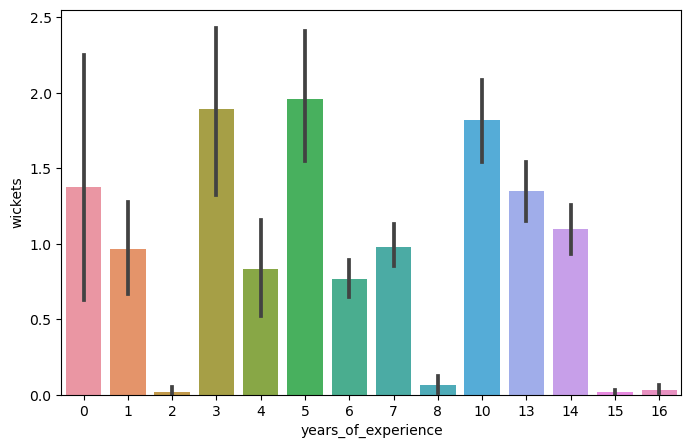

In [68]:
plt.figure(figsize =(8,5))
sns.barplot(data =df, x='years_of_experience', y ='wickets');

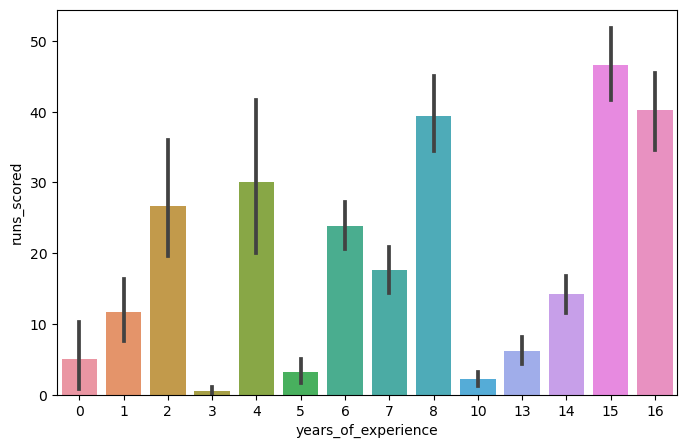

In [69]:
plt.figure(figsize =(8,5))
sns.barplot(data =df, x='years_of_experience', y ='runs_scored');

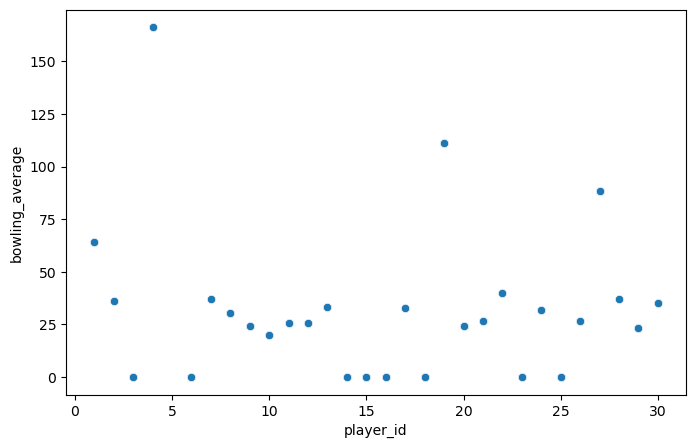

In [70]:
plt.figure(figsize =(8,5))
sns.scatterplot(data =df, x='player_id', y ='bowling_average');

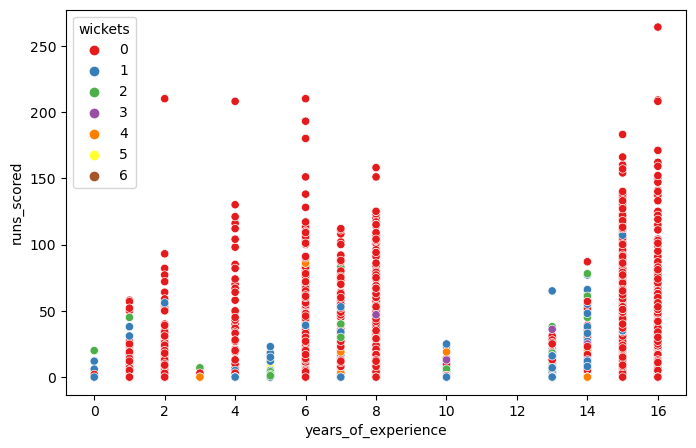

In [71]:
plt.figure(figsize =(8,5))
sns.scatterplot(data =df, x='years_of_experience', y ='runs_scored', hue='wickets', palette='Set1');

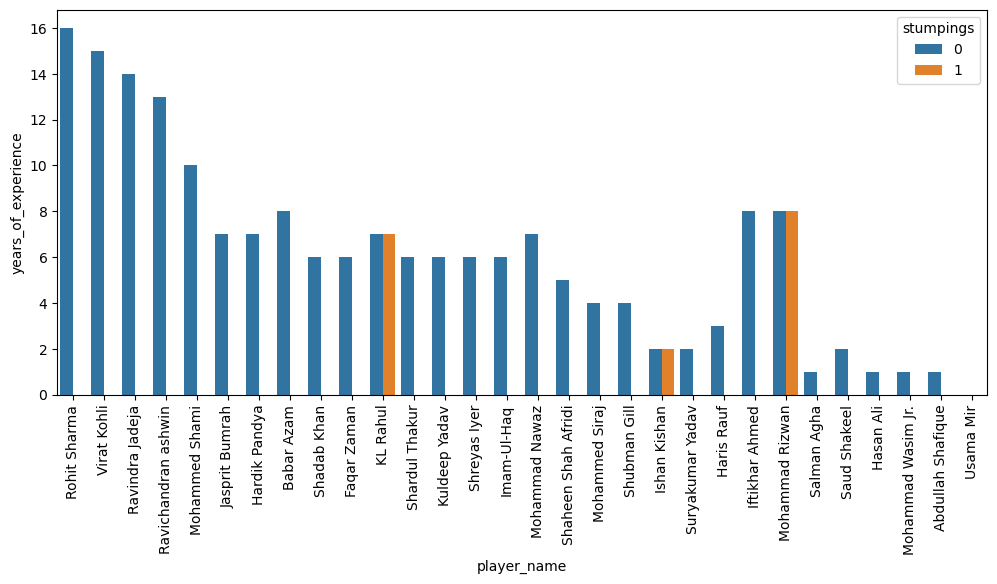

In [72]:
plt.figure(figsize =(12,5))
sns.barplot(data =df, x='player_name', y ='years_of_experience',hue='stumpings')
plt.xticks(rotation= 90);

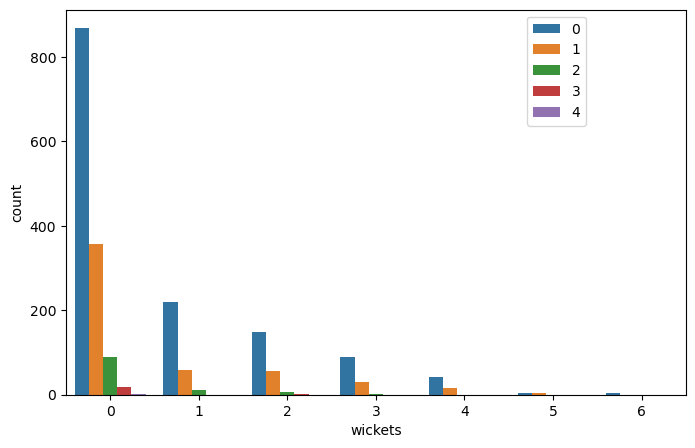

In [73]:
plt.figure(figsize =(8,5))
sns.countplot(data =df, x='wickets', hue ='catches')
plt.legend(bbox_to_anchor=[0.85,1,0,0]);

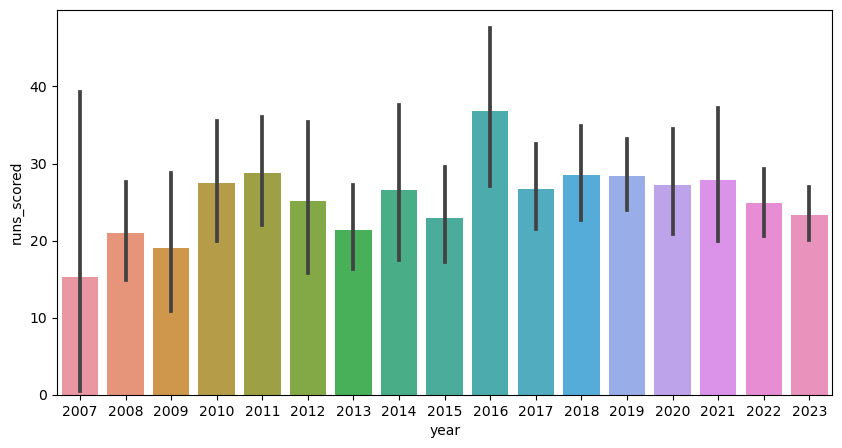

In [74]:
plt.figure(figsize =(10,5))
sns.barplot(data =df, x='year', y ='runs_scored');

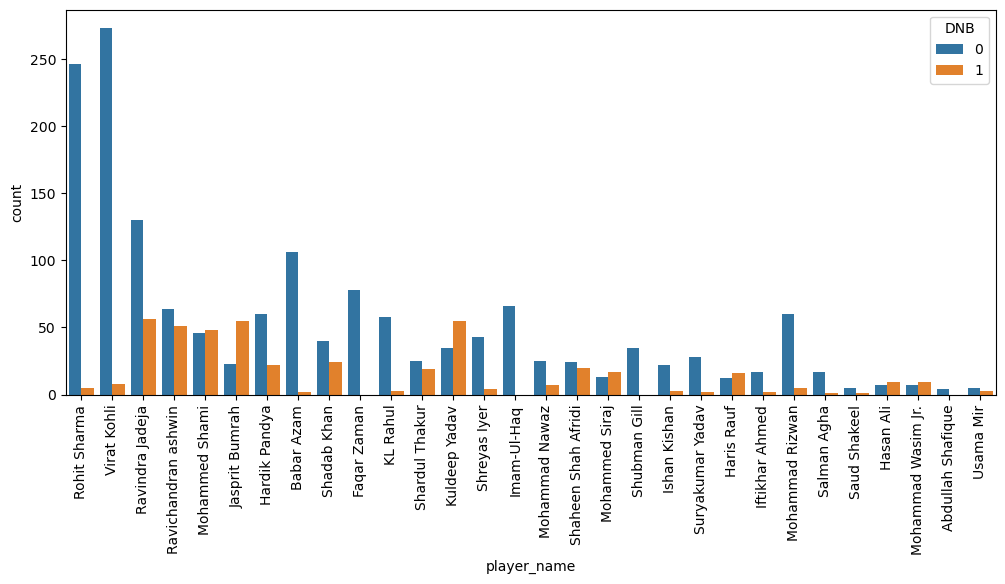

In [75]:
plt.figure(figsize =(12,5))
sns.countplot(data =df, x='player_name', hue='DNB')
plt.xticks(rotation=90);

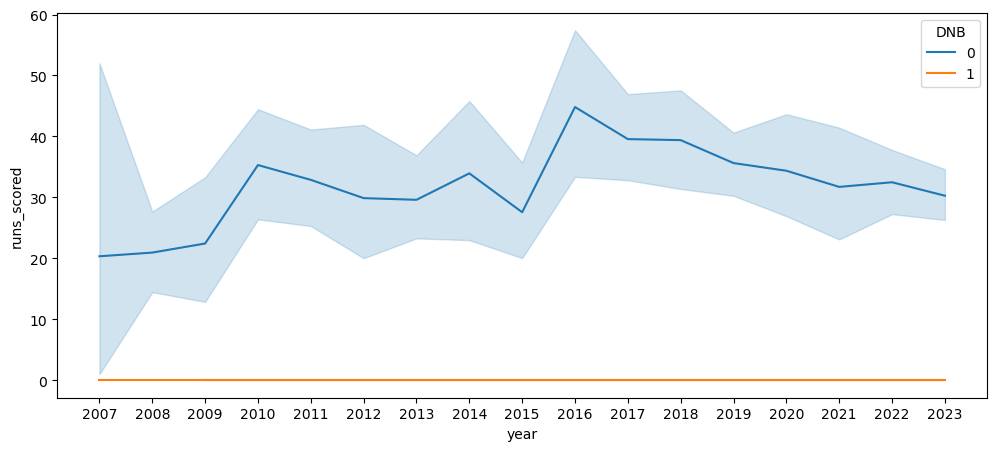

In [76]:
plt.figure(figsize =(12,5))
sns.lineplot(data =df, x='year', y='runs_scored', hue='DNB')
plt.xticks(df['year'].unique());

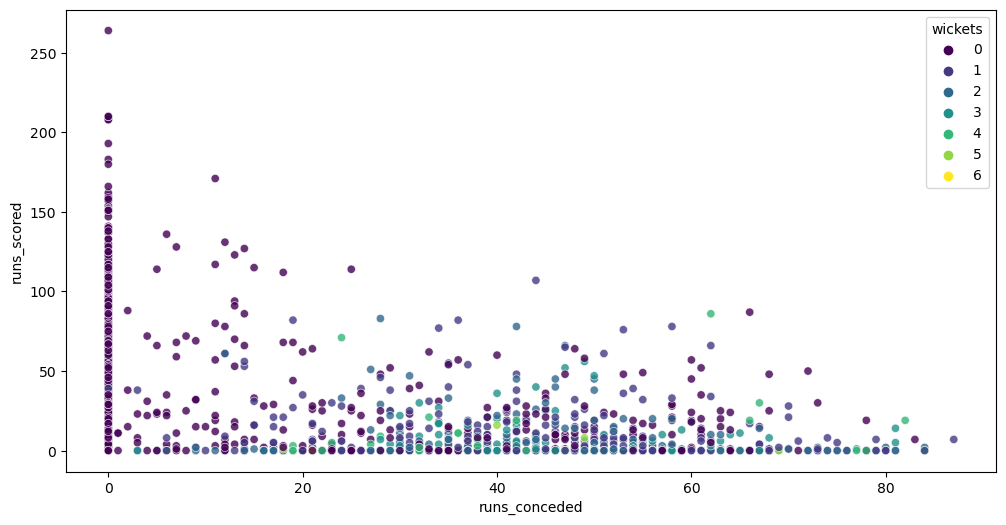

In [77]:
plt.figure(figsize =(12,6))
sns.scatterplot(data =df, x='runs_conceded', y='runs_scored', hue='wickets',palette='viridis',alpha=0.8);

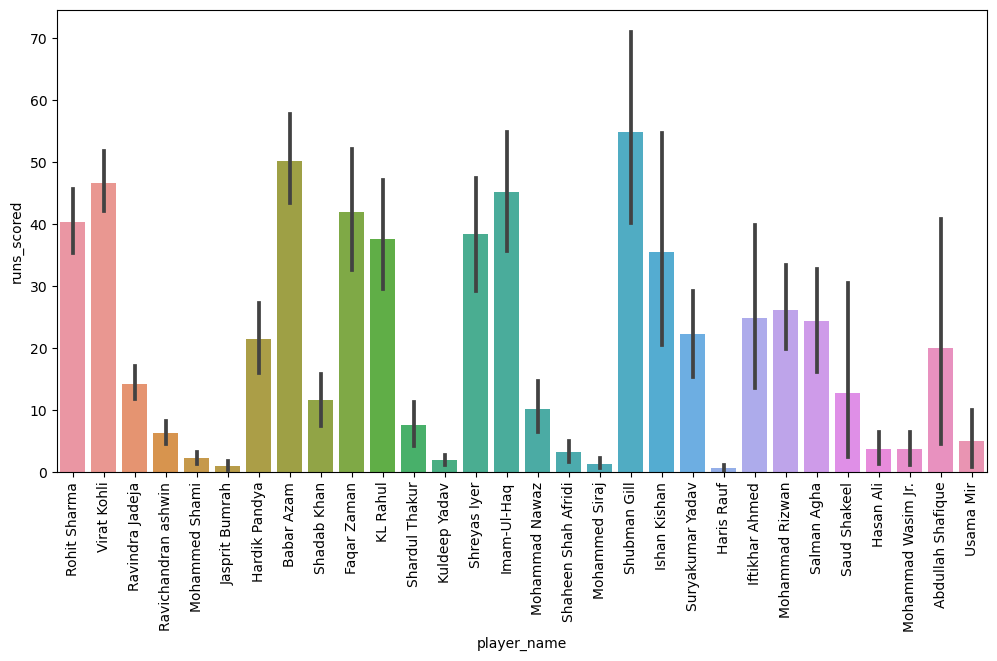

In [78]:
plt.figure(figsize =(12,6))
sns.barplot(data =df, x='player_name',y='runs_scored');
plt.xticks(rotation=90);

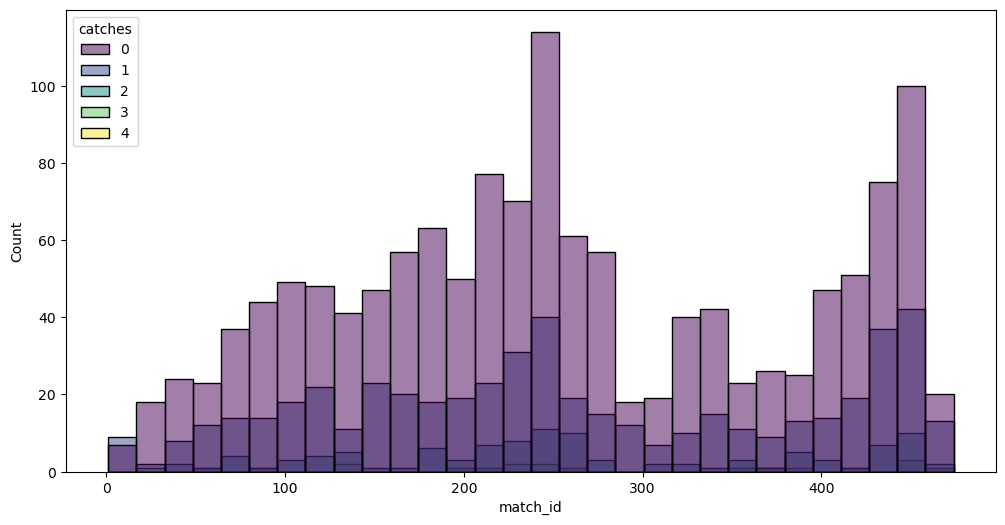

In [79]:
plt.figure(figsize =(12,6))
sns.histplot(data =df, x='match_id',hue='catches', palette='viridis', bins=30);

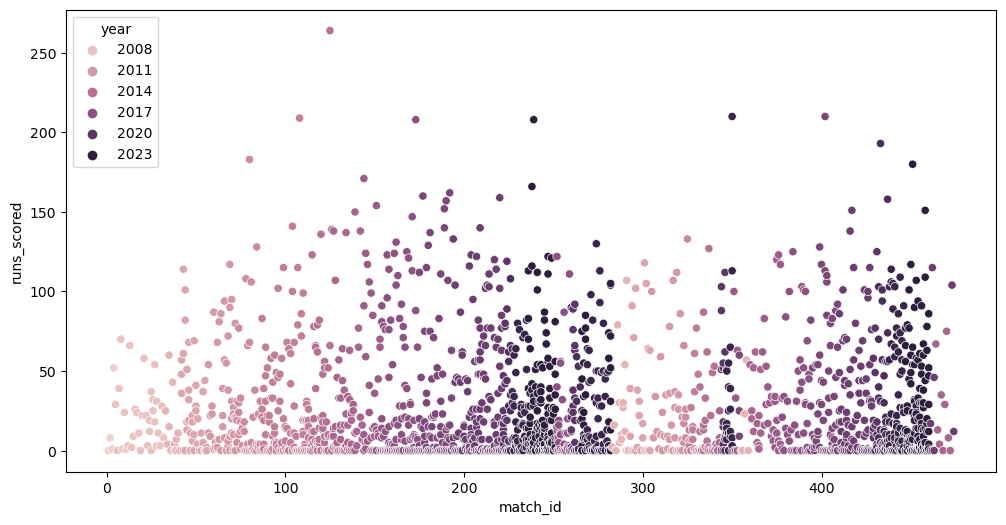

In [80]:
plt.figure(figsize =(12,6))
sns.scatterplot(data =df, x='match_id', y='runs_scored', hue='year');

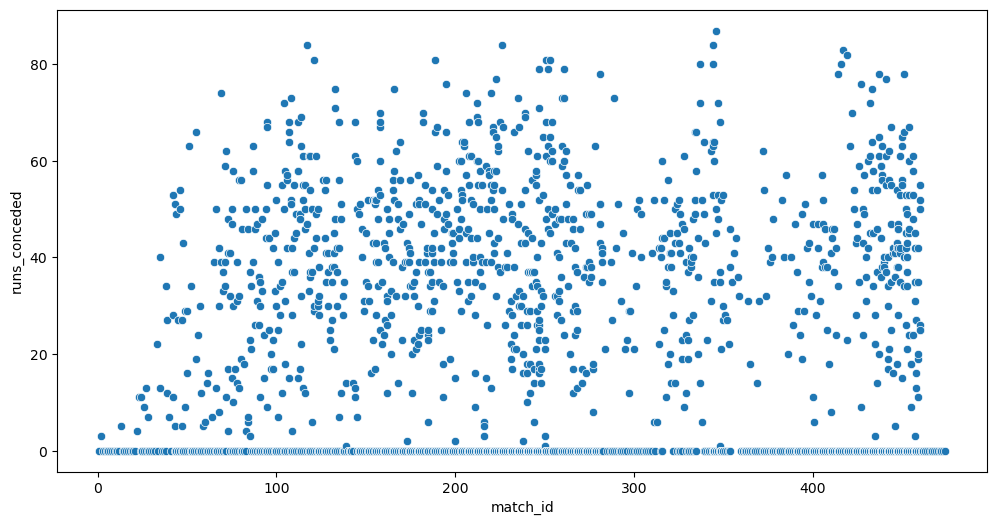

In [81]:
plt.figure(figsize =(12,6))
sns.scatterplot(data =df, x='match_id', y='runs_conceded');

<Figure size 1200x600 with 0 Axes>

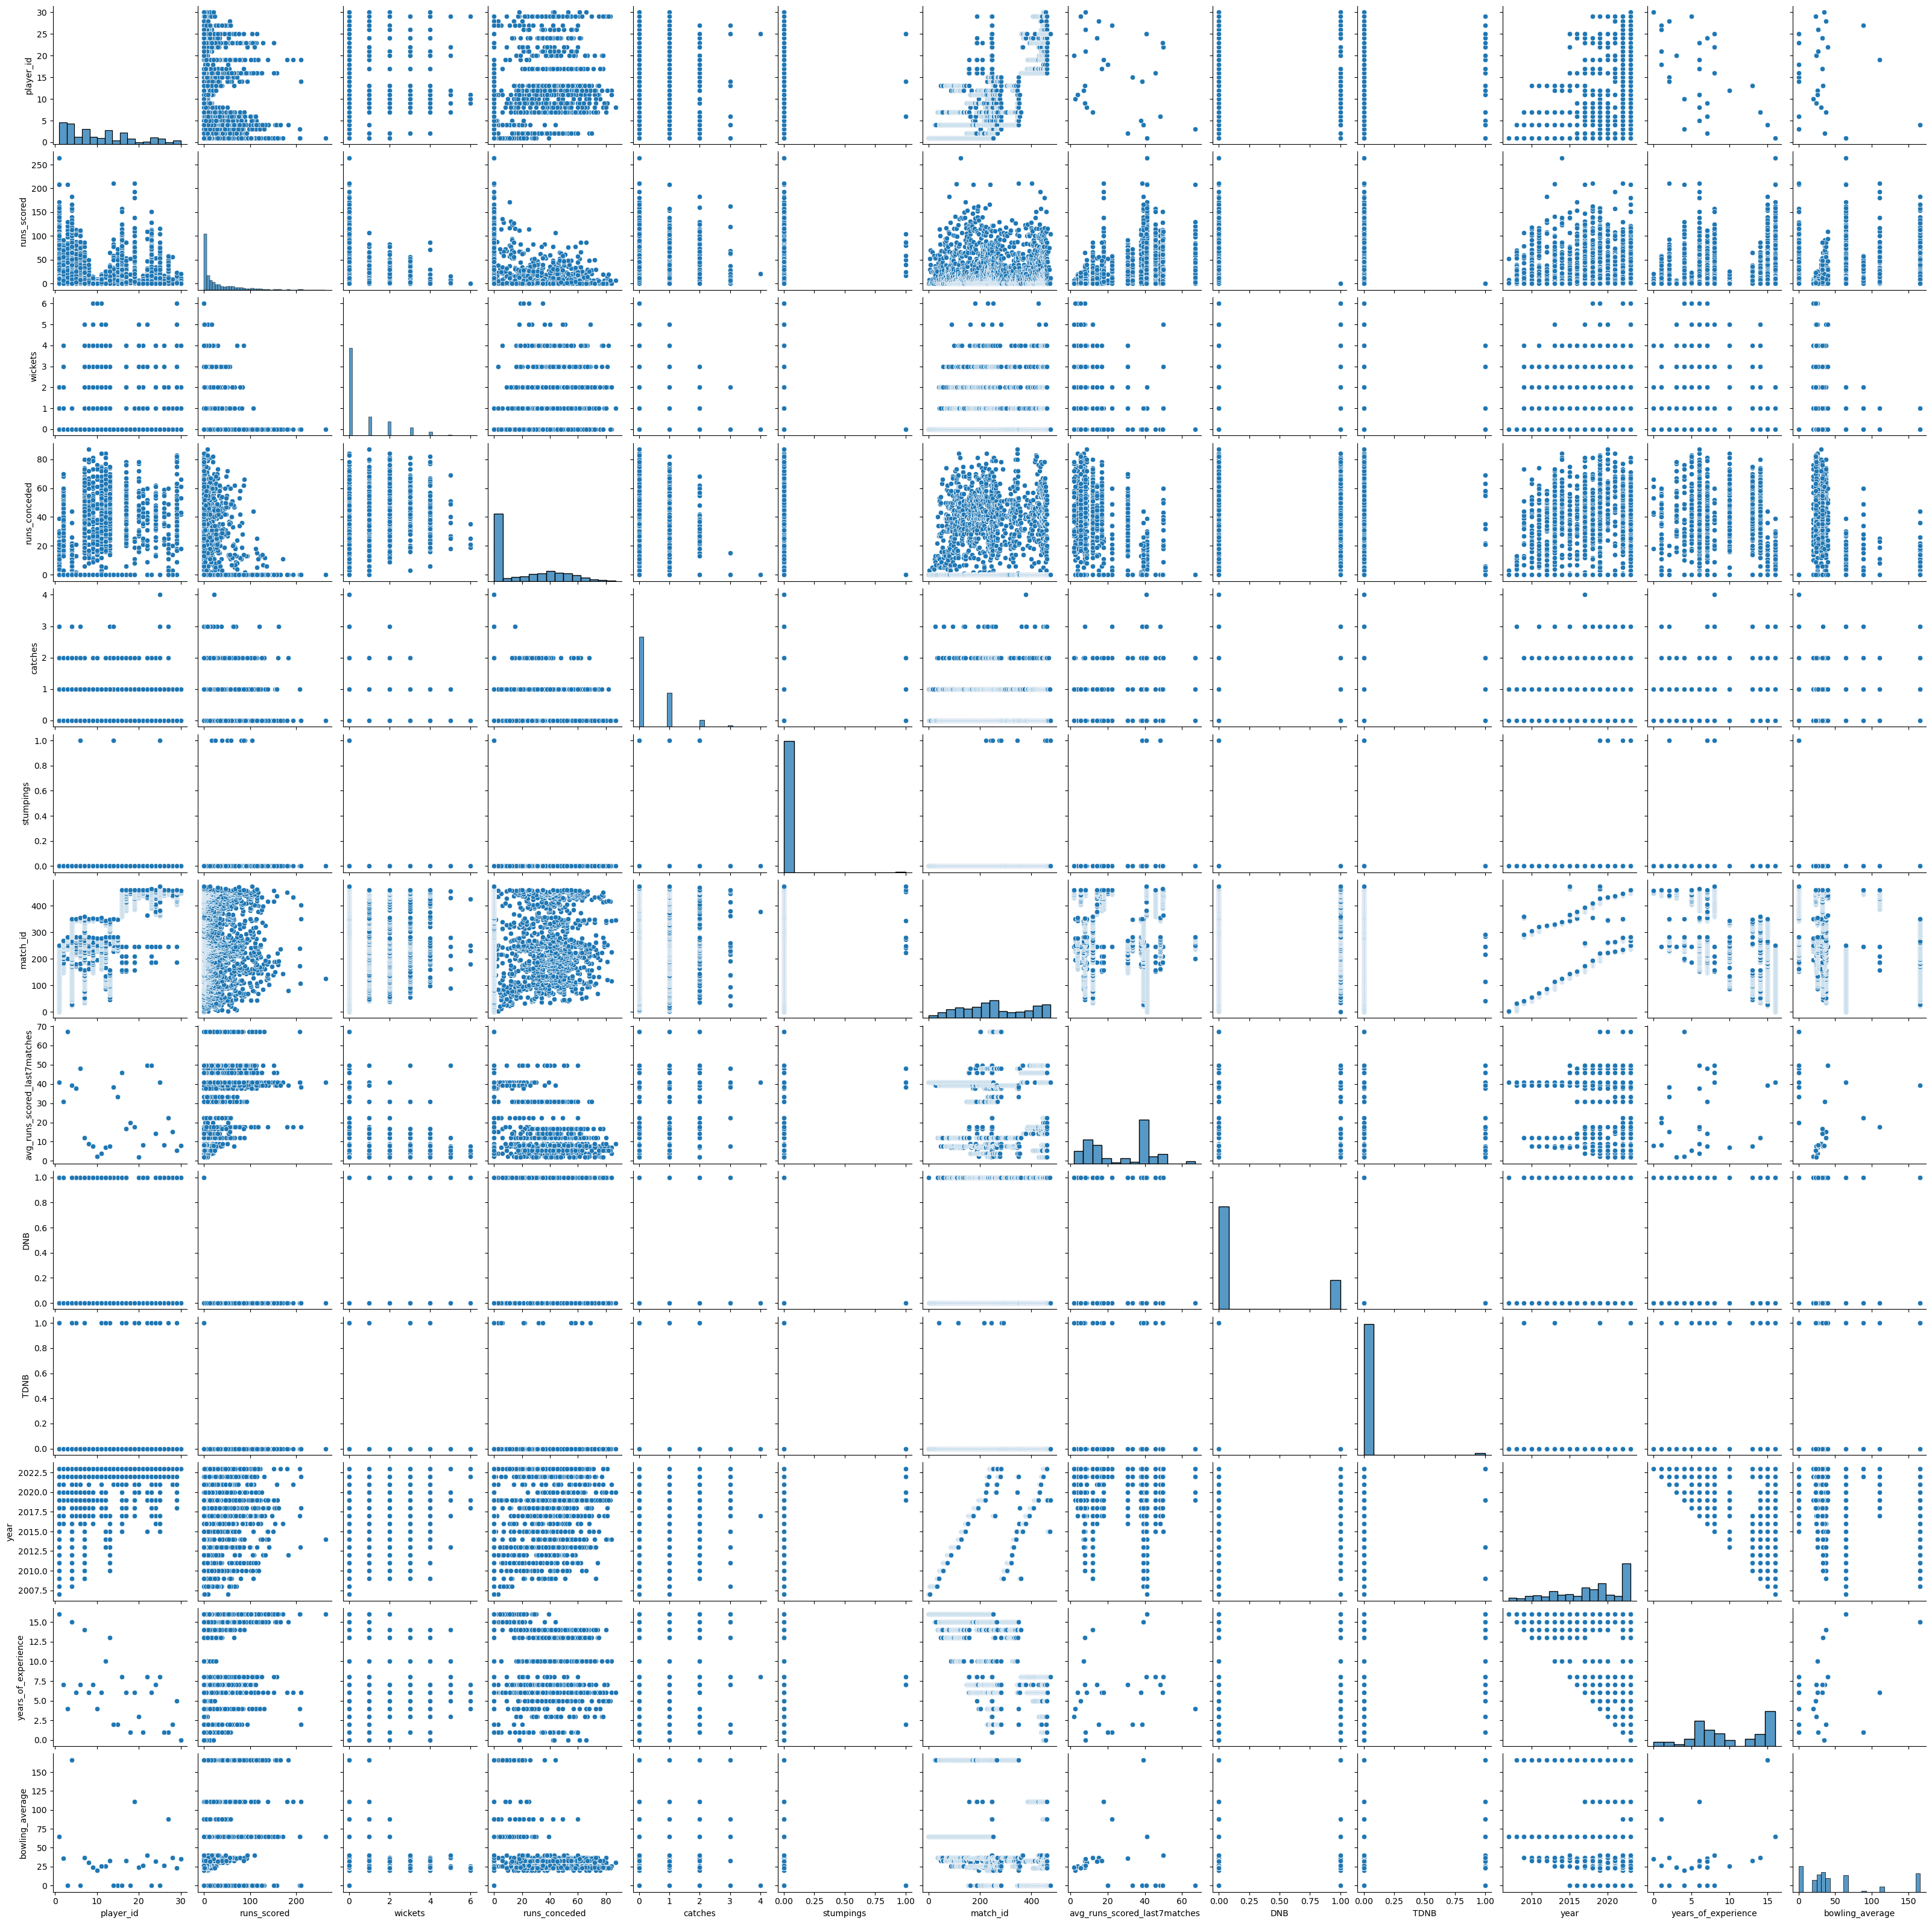

In [82]:
plt.figure(figsize =(12,6))
sns.pairplot(data =df);

In [177]:
means = df.groupby('player_name')[['runs_scored','wickets']].mean().reset_index().rename(columns={'runs_scored': 'mean_runs_scored', 'wickets': 'mean_wicket'})

In [178]:
# Calculate mean runs and wickets per year for each player
means_per_yr = df.groupby(['player_name', 'year'])[['runs_scored', 'wickets','runs_conceded']].mean().reset_index()

# Merge the means_per_yr DataFrame with your original DataFrame 'df'
df = df.merge(means_per_yr, on=['player_name', 'year'], suffixes=('', '_mean/yr'), how='left')

In [179]:
# Calculate mean runs and wickets per year for each player
means_per_opposition = df.groupby(['player_name', 'opposition'])[['runs_scored', 'wickets','runs_conceded']].mean().reset_index()

# Merge the means_per_yr DataFrame with your original DataFrame 'df'
df = df.merge(means_per_opposition, on=['player_name', 'opposition'], suffixes=('', '_mean/opp'), how='left')

In [180]:
# Merge the 'bowling_average' DataFrame with 'df' using a left join on 'player_name'
df = df.merge(means, on='player_name', how='left')

In [181]:
df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id,...,years_of_experience,bowling_average,runs_scored_mean/yr,wickets_mean/yr,runs_conceded_mean/yr,runs_scored_mean/opp,wickets_mean/opp,runs_conceded_mean/opp,mean_runs_scored,mean_wicket
0,1,Rohit Sharma,0,0,0,1,0,2007-06-23,v Ireland Belfast,1,...,16,64.375,15.25,0.0,0.750000,0.00,0.00,0.00,40.286853,0.031873
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2,...,16,64.375,15.25,0.0,0.750000,8.00,0.00,3.00,40.286853,0.031873
2,1,Rohit Sharma,1,0,0,0,0,2007-10-05,v Australia Hyderabad,3,...,16,64.375,15.25,0.0,0.750000,19.00,0.00,0.00,40.286853,0.031873
3,1,Rohit Sharma,52,0,0,1,0,2007-11-18,v Pakistan Jaipur,4,...,16,64.375,15.25,0.0,0.750000,52.00,0.00,0.00,40.286853,0.031873
4,1,Rohit Sharma,29,0,0,0,0,2008-02-03,v Australia Brisbane,5,...,16,64.375,19.00,0.0,2.142857,38.75,0.25,4.25,40.286853,0.031873


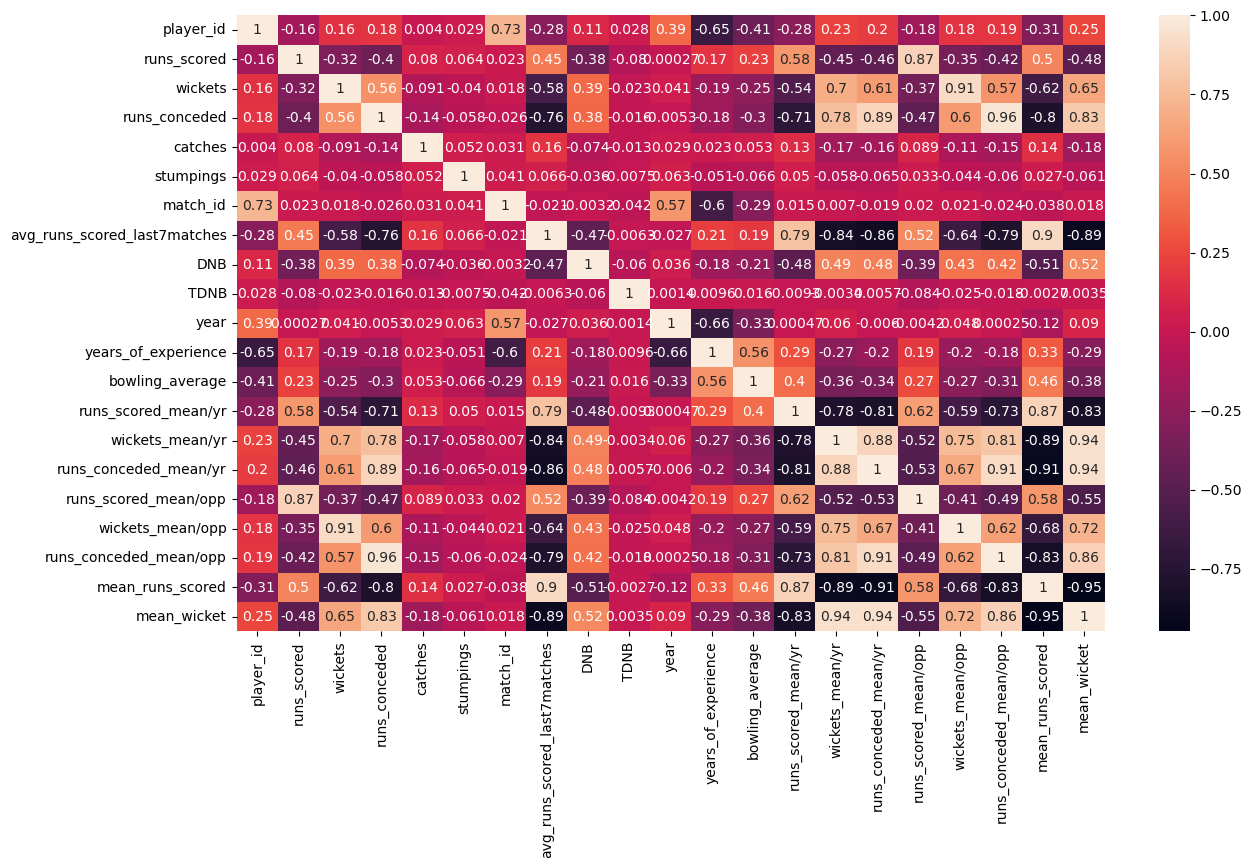

In [182]:
plt.figure(figsize =(14,8))
sns.heatmap(df.corr(),annot=True);

<Figure size 2000x500 with 0 Axes>

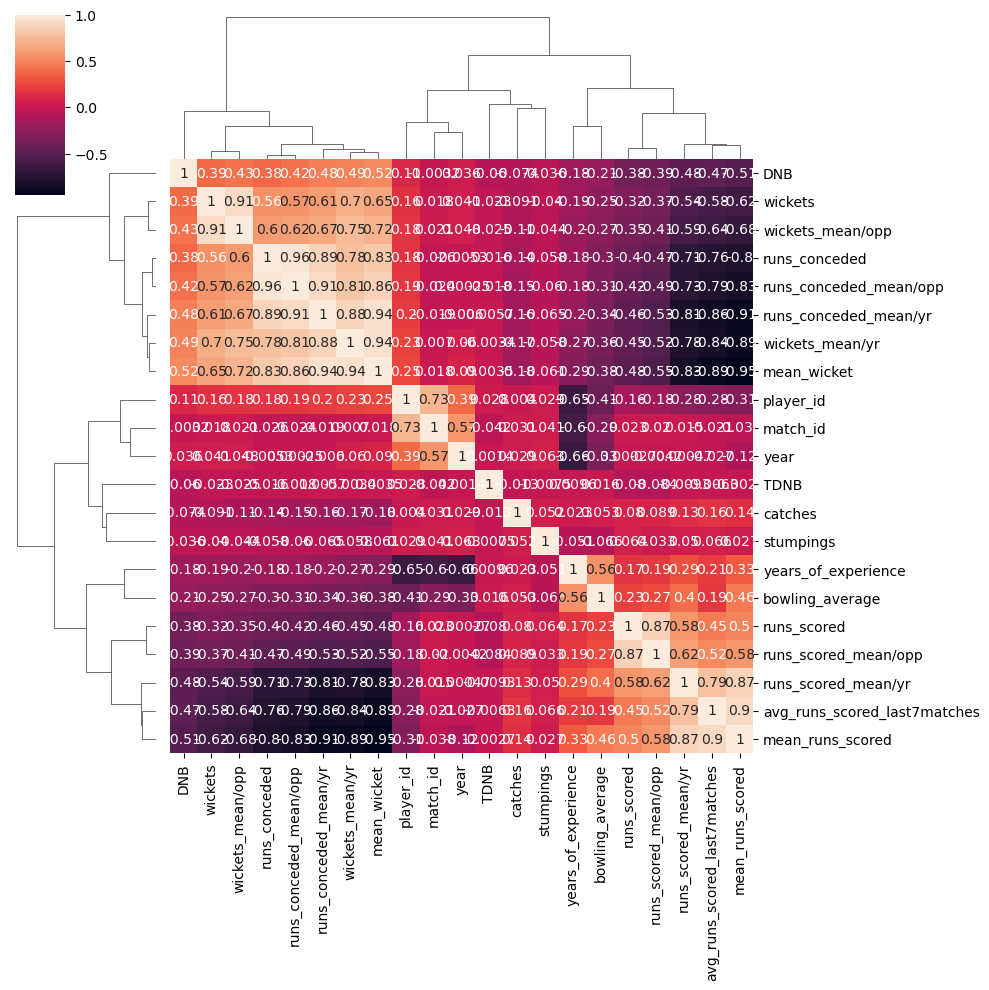

In [183]:
plt.figure(figsize =(20,5), dpi = 100)
sns.clustermap(df.corr(),annot=True);

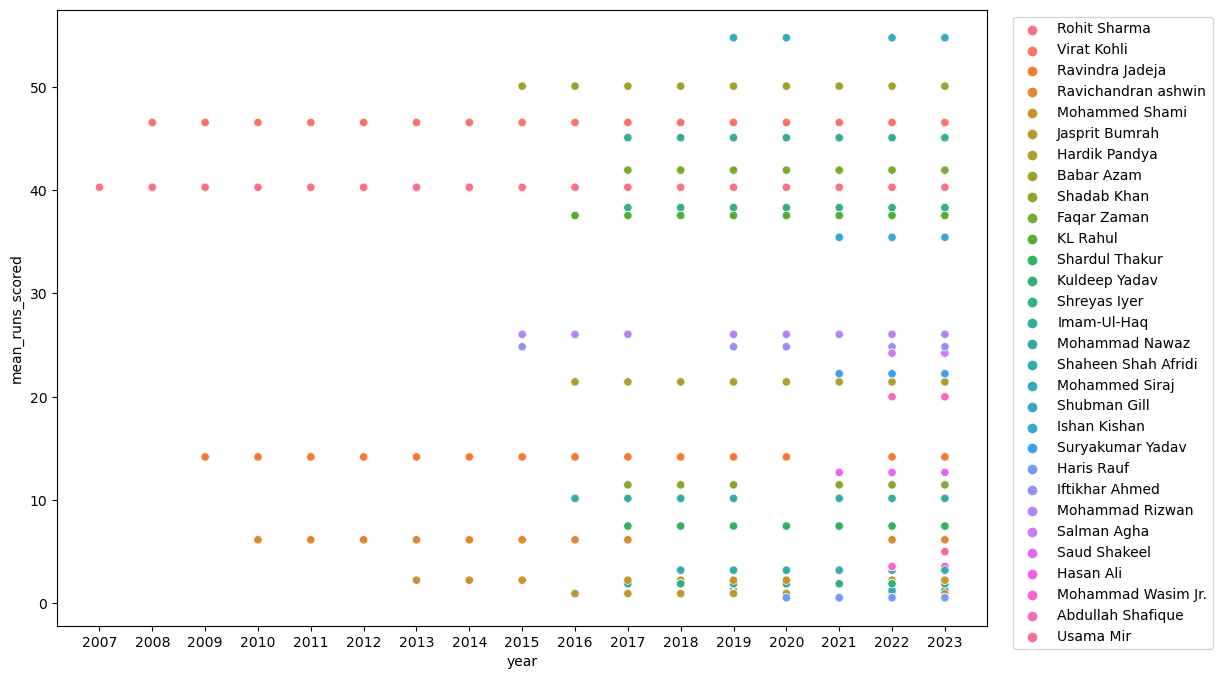

In [184]:
plt.figure(figsize =(12,8))
sns.scatterplot(data =df, x='year', y='mean_runs_scored', hue='player_name')
plt.xticks(df['year'].unique())
plt.legend(bbox_to_anchor= [0.25,0,1,1]);

In [185]:
top_teams = df.groupby('opposition')[['runs_scored','runs_conceded']].sum().reset_index().sort_values('runs_scored',ascending=False)[:10]

In [186]:
top_teams

,opposition,runs_scored,runs_conceded
173,v Sri Lanka Colombo (RPS),1489,1097
111,v New Zealand Karachi,1424,1601
232,v Zimbabwe Bulawayo,1383,400
223,v West Indies Port of Spain,1281,645
48,v Bangladesh Mirpur,978,548
233,v Zimbabwe Harare,957,603
31,v Australia Sydney,897,939
146,v South Africa Centurion,896,830
230,v West Indies Visakhapatnam,844,657
71,v England Pune,730,596


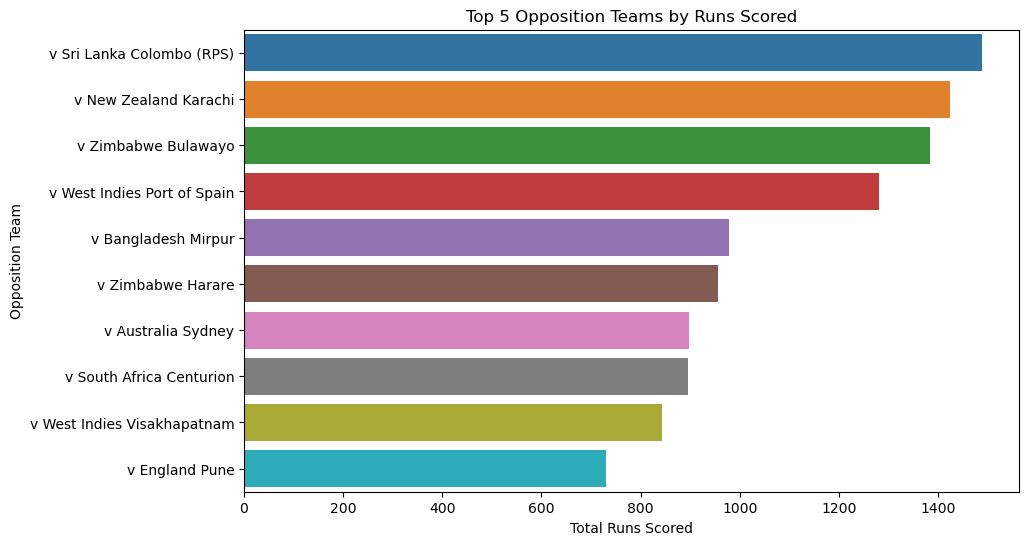

In [187]:
plt.figure(figsize=(10, 6))
sns.barplot(x='runs_scored', y='opposition', data=top_teams, orient='h')
plt.xlabel('Total Runs Scored')
plt.ylabel('Opposition Team')
plt.title(f'Top {5} Opposition Teams by Runs Scored')
plt.show()

In [193]:
# Create a DataFrame 'inf_rows' by filtering rows with infinite 'bowling_average'
inf_rows = df[np.isinf(df['bowling_average'])]

In [194]:
# Replace infinite values with zeros in the 'bowling_average' column
df['bowling_average'].replace([float('inf')], 0, inplace=True)

In [195]:
df.isnull().sum()

player_id                       0
player_name                     0
runs_scored                     0
wickets                         0
runs_conceded                   0
catches                         0
stumpings                       0
match_date                      0
opposition                      0
match_id                        0
avg_runs_scored_last7matches    0
DNB                             0
TDNB                            0
year                            0
years_of_experience             0
bowling_average                 0
runs_scored_mean/yr             0
wickets_mean/yr                 0
runs_conceded_mean/yr           0
runs_scored_mean/opp            0
wickets_mean/opp                0
runs_conceded_mean/opp          0
mean_runs_scored                0
mean_wicket                     0
dtype: int64

In [196]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)

In [197]:
# Export the DataFrame 'df' to a CSV file named 'cricket.csv' without including the index column
shuffled_df.to_csv('cricket2--.csv', index=False)

In [198]:
shuffled_df.shape

(2021, 24)